In [1]:
%pylab inline
import pandas as pd
import seaborn
import numpy as np
from collections import Counter
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


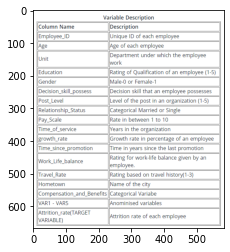

In [2]:
image = mpimg.imread("ii.png")
plt.imshow(image)
plt.show()

In [3]:
info = pd.read_csv("Desktop/Train.csv")
info

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [4]:
info['Age'].median()

37.0

In [5]:
info['Age'].mean()

39.62279902853673

In [6]:
info['Age'].std()

13.606919936795954

In [7]:
info['Time_of_service'].median()

10.0

In [8]:
info['Time_of_service'].mean()

13.385064177362894

In [9]:
info['Time_of_service'].std()

10.364188402882295

In [10]:
info['Work_Life_balance'].median()

2.0

In [11]:
info['Work_Life_balance'].mean()

2.3878952639862643

In [12]:
info['Work_Life_balance'].std()

1.122786312743072

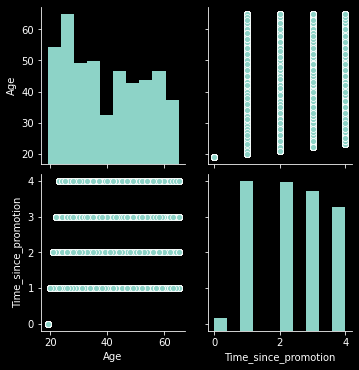

In [13]:
plt.style.use('dark_background')
a = info[['Age', 'Time_since_promotion']]
seaborn.pairplot(a, dropna=True)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'The age of workers')

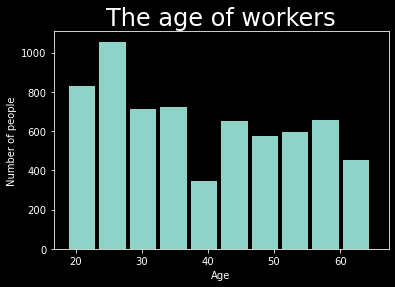

In [14]:
plt.style.use('dark_background')
plt.hist(info.Age, width = 4)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('The age of workers', fontsize = 24)

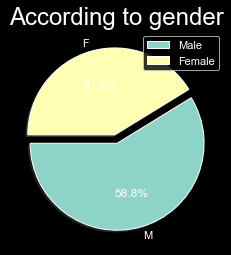

In [15]:
seaborn.set()
plt.style.use('dark_background')
a=info.groupby('Gender').agg('count')
b = a['Employee_ID']
plt.title('According to gender', fontsize = 24)
type_labels = a.Employee_ID.sort_values().index
c = (0.05,0.05)
pie(b, labels=type_labels, explode=c, shadow=True, autopct='%1.1f%%',startangle=180)
plt.legend(labels=['Male','Female'])

In [16]:
q = info['Gender'] == 'M'
w = info['Gender'] == 'F'
print('Average attrition rate of male workers (%): ', info.loc[q, 'Attrition_rate'].max()*100)
print('Average attrition rate of female workers (%): ', info.loc[w, 'Attrition_rate'].max()*100)

Average attrition rate of male workers (%):  98.97
Average attrition rate of female workers (%):  99.59


In [17]:
q = info['Gender'] == 'M'
w = info['Gender'] == 'F'
print('Average service time of male workers (%): ', info.loc[q, 'Time_of_service'].max())
print('Average service time of female workers (%): ', info.loc[w, 'Time_of_service'].max())

Average service time of male workers (%):  43.0
Average service time of female workers (%):  43.0


Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions. Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization. The evaluation metric that is used for this problem is the root mean squared error. 

The formula is as follows: score=100*max(0, 1-RMSE(actual, predicted))

Also, due to this analysis we can understand that, unfortunately, there is a well-seeng discrimination against women employees. Firstly, there are more men workers than women. Secondly, despite the fact that there are less women, their attrition rate is a little higher than men’s one. 

Also, we can investigate some obvious facts as, for example, that young employees have less previous working experience than old ones.  